# Task-5: PRODIGY_DS_05

## Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

## Importig Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Loading the data

In [38]:
df = pd.read_csv("prodigy info tech/Road.csv")
warnings.filterwarnings("ignore")

In [7]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Knowing about data

In [11]:
df.shape

(12316, 32)

In [9]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [10]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [14]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [18]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [19]:
data.isna().sum().reset_index()

,index,0
0,Time,0
1,Day_of_week,0
2,Age_band_of_driver,0
3,Sex_of_driver,0
4,Educational_level,741
5,Vehicle_driver_relation,579
6,Driving_experience,829
7,Type_of_vehicle,950
8,Owner_of_vehicle,482
9,Service_year_of_vehicle,3928


## Processing the data

In [20]:
pd.set_option('display.max_columns', None)
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [36]:
#Convert the 'Time' column to datetime format
df['Time'] = df['Time'].astype('datetime64[ns]')
df.loc[::, "Time"].reset_index()

,index,Time
0,0,2024-02-18 17:02:00
1,1,2024-02-18 17:02:00
2,2,2024-02-18 17:02:00
3,3,2024-02-18 01:06:00
4,4,2024-02-18 01:06:00
...,...,...
12311,12311,2024-02-18 16:15:00
12312,12312,2024-02-18 18:00:00
12313,12313,2024-02-18 13:55:00
12314,12314,2024-02-18 13:55:00


## Cleaning the data

In [22]:
df[["Casualty_class", "Sex_of_casualty", "Age_band_of_casualty", "Casualty_severity", "Work_of_casuality","Fitness_of_casuality"]].dropna()

,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality
3,Pedestrian,Female,18-30,3,Driver,Normal
5,Driver or rider,Male,31-50,3,Driver,Normal
6,Driver or rider,Female,18-30,3,Driver,Normal
8,Pedestrian,Male,Under 18,3,Driver,Normal
9,Passenger,Male,18-30,3,Driver,Normal
...,...,...,...,...,...,...
12311,na,na,na,na,Driver,Normal
12312,na,na,na,na,Driver,Normal
12313,Driver or rider,Male,31-50,3,Driver,Normal
12314,na,na,na,na,Driver,Normal


# Analysing the data using EDA-Exploratory Data Analysis

### Analysing the Age of driver

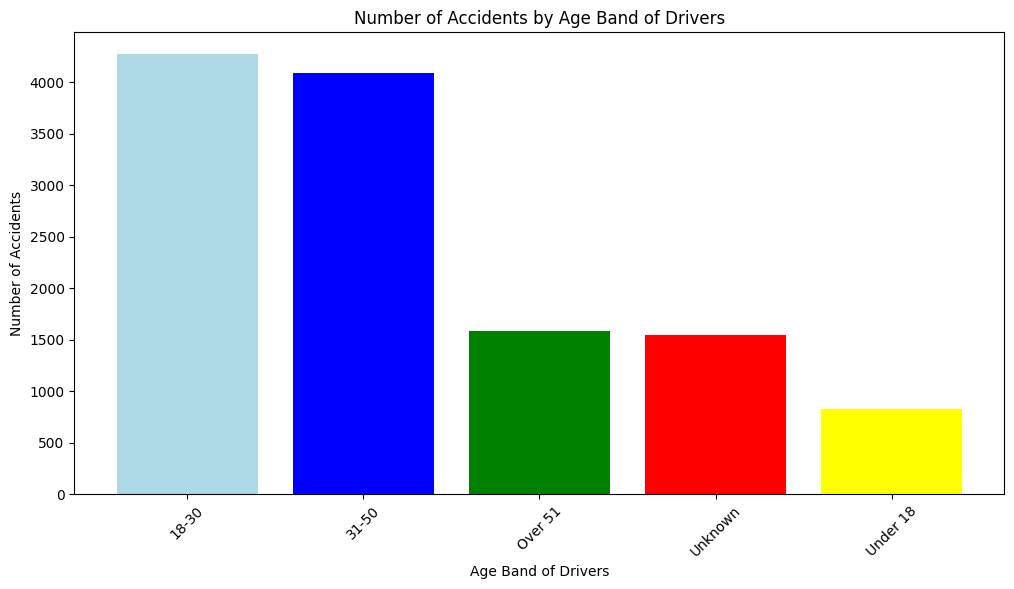

In [24]:
age_band_counts = df['Age_band_of_driver'].value_counts()
color = ['lightblue', 'blue', 'green', 'red', 'yellow']
plt.figure(figsize=(12, 6))
plt.bar(age_band_counts.index, age_band_counts.values, color=color)
plt.title('Number of Accidents by Age Band of Drivers') #This line sets the title of the plot.
plt.xlabel('Age Band of Drivers') #This line sets the label for the x-axis.
plt.ylabel('Number of Accidents') #This line sets the label for the y-axis.
plt.xticks(rotation=45)
plt.show()

### Note:The age band with the highest number of accidents is 18-30 and also their is not huge difference in 31-50 age band

### Analysing each day of the week

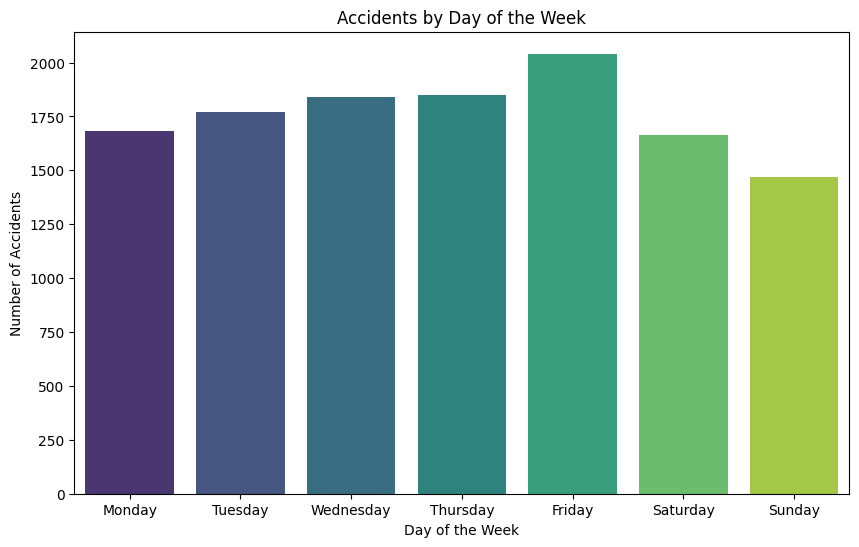

In [25]:
day_of_week_counts = df['Day_of_week'].value_counts()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_counts = day_of_week_counts.reindex(days_order) # The reindex method in pandas is used to change the order of the elements in a Series or DataFrame along a particular axis. It returns a new object with the data conformed to a new index.
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts, palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

### Note: The graph displays the days with the most and least accidents. The days with the highest bars are the ones that had the most accidents, as you can see. Friday is more.


### Analysing the Education Level of Driver

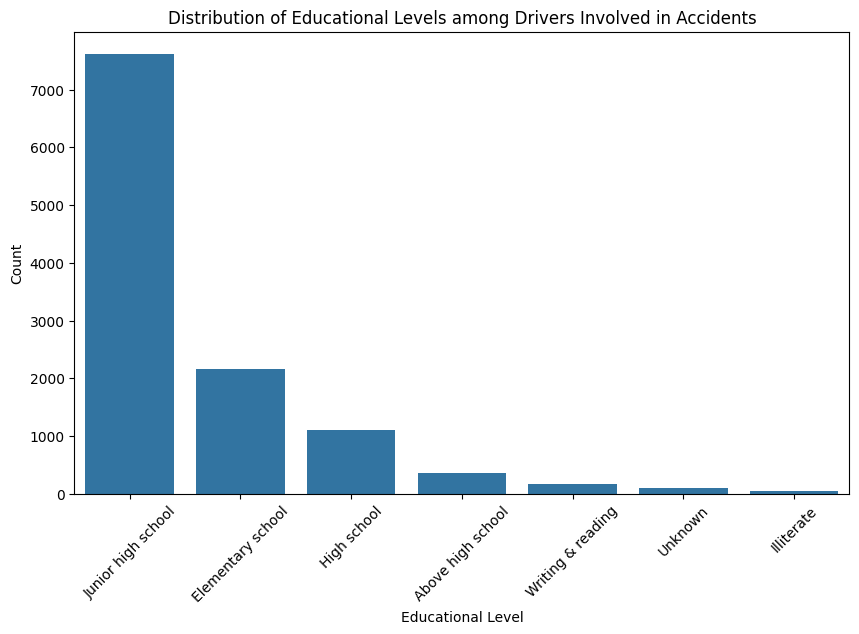

In [26]:
education_counts = df['Educational_level'].value_counts()
most_common_education = education_counts.idxmax() # The idxmax() method in pandas is used to find the index (label) of the first occurrence of the maximum value in a Series.
plt.figure(figsize=(10, 6))
sns.countplot(x='Educational_level', data=data, order=data['Educational_level'].value_counts().index)
plt.title('Distribution of Educational Levels among Drivers Involved in Accidents')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Note: Most of the accidents are involved by the Junior high school level people

## Analysing using day of the week

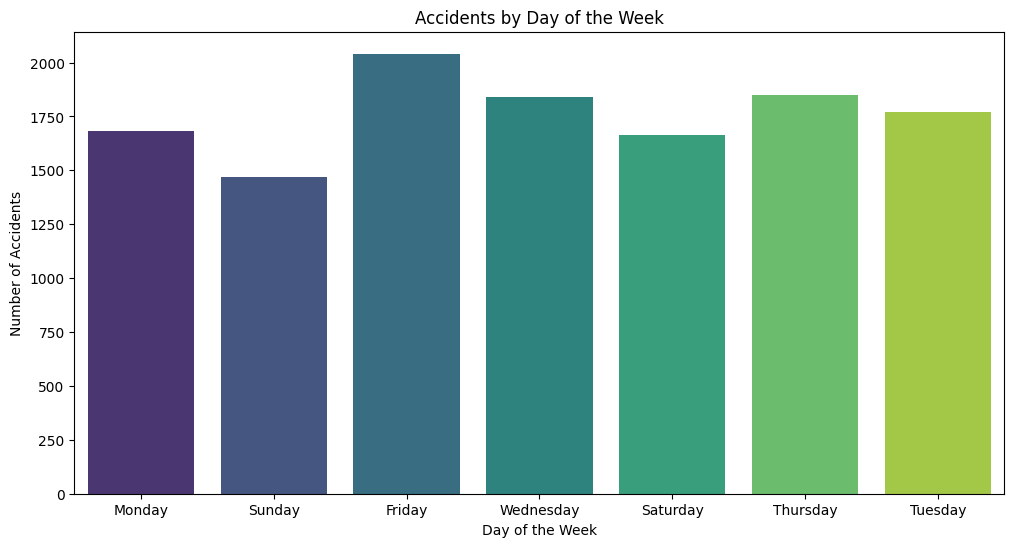

In [27]:
df['Day_of_week'] = pd.Categorical(data['Day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_week', data=data, palette='viridis')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

### Note: It seems every day has equal number of accidents

## Analying using hour of the day

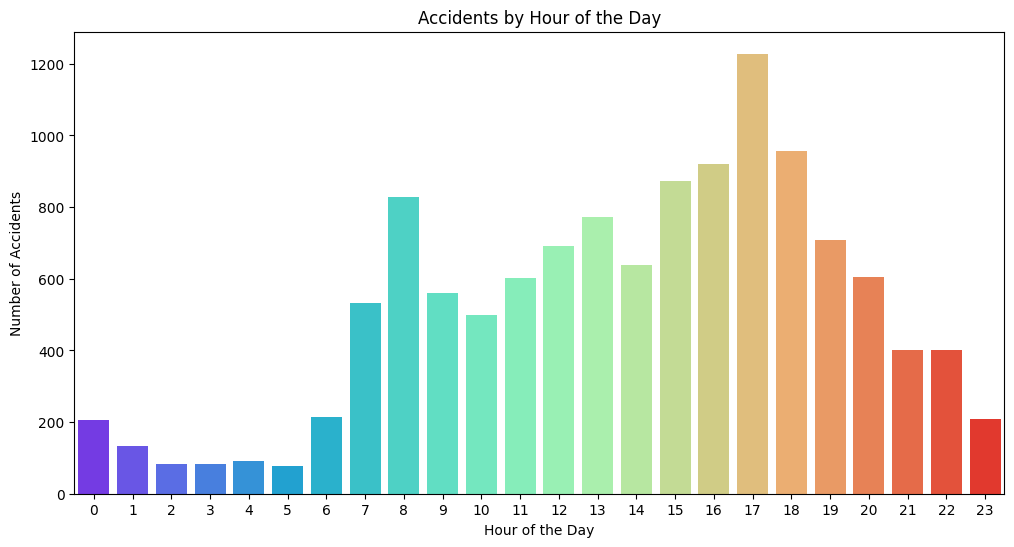

In [29]:
df['Hour'] = df['Time'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df, palette='rainbow')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

### Note: Most of the accidents are happening at the night time around 7pm to 10pm

### Analysing using the Type of vechile 

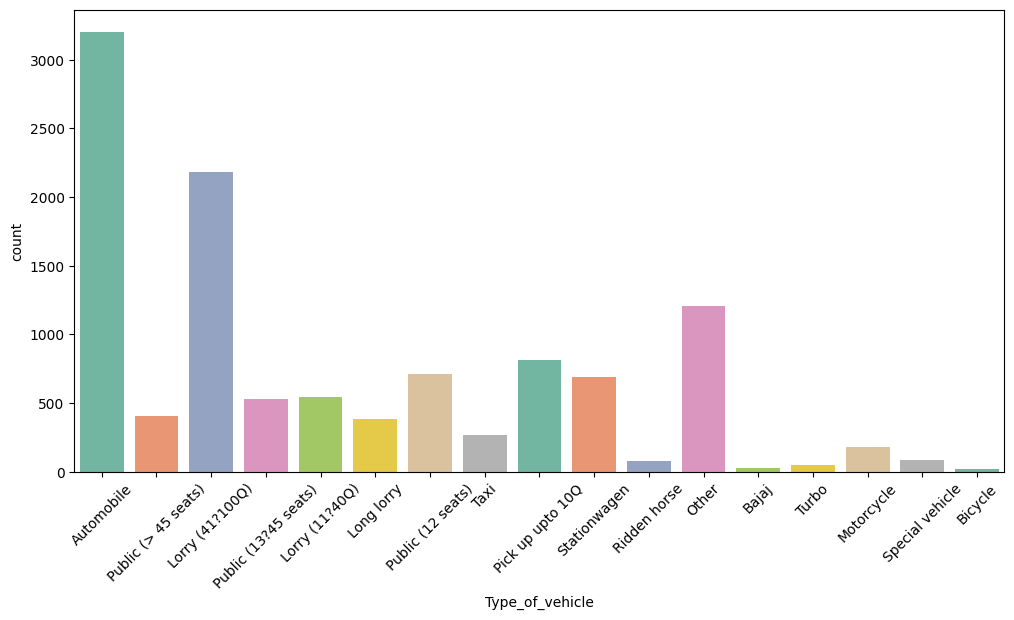

In [30]:
accident_due_vehicles = df["Type_of_vehicle"].reset_index() #  When you apply reset_index(), it resets the index of the DataFrame or Series and creates a new default integer index.
plt.figure(figsize = (12, 6))
sns.countplot(x='Type_of_vehicle',data=accident_due_vehicles,palette='Set2')
plt.xticks(rotation=45)
plt.show()

### Note: Most of the accidents are happening to the Automobiles

## Comparing weekdays and weekends

In [32]:
df['Weekday'] = df['Day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
weekday_weekend_counts = df.groupby(['Weekday', 'Accident_severity']).size().unstack().reset_index() #unstack() is used to reshape the given Pandas DataFrame by transposing specified row level to column level.
print(weekday_weekend_counts)

Accident_severity  Weekday  Fatal injury  Serious Injury  Slight Injury
0                  Weekday            86            1308           7789
1                  Weekend            72             435           2626


### Note: We can observe that weekdays has more accidents then weekends

## Analyisng using part of the day

In [34]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce') # If the error argument is passed as coerce , then invalid parsing will be set as NaN .
def categorize_part_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'
df['Part_of_Day'] = df['Time'].dt.hour.apply(categorize_part_of_day)
df["Part_of_Day"].value_counts()

Part_of_Day
Afternoon    5125
Morning      3312
Evening      3280
Night         599
Name: count, dtype: int64

### Note: Most of the accidents are happening on the afternoon time of the day

## Analysing using yearof exprerience

In [35]:
grouped_data  = df.groupby('Driving_experience')['Accident_severity'].value_counts()
most_common_sources = grouped_data.groupby('Accident_severity').idxmax()
most_common_sources

Accident_severity
Fatal injury         (2-5yr, Fatal injury)
Serious Injury    (5-10yr, Serious Injury)
Slight Injury      (5-10yr, Slight Injury)
Name: count, dtype: object

## Note: This category implies injuries that are: 
### 1.fatal caused by Driver with experience 2 to 5 years old.
### 2.Serious caused by Driver with experience 5 to 10 years old.
### 3.Slight caused by Driver with experience 5 to 10 years old.ld